## Visualizing Filters and Feature Maps in Convolutional Neural Networks

In [3]:
# Import all the libraries and modules
import torch

# for Model
import torch.nn as nn
from torchvision import models

# for Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [4]:
# load the ResNet18 model
model = models.resnet18(pretrained=True)
model

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
# get all the model children as list
model_children = list(model.children())
print(model_children[4])

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)


We need to save all the convolutional layers and the respective weights.

Specifically, we are checking for convolutional layers at three levels of nesting.

In [12]:
# Save the conv layer weights in this list
model_weights = []

# Save the conv layers in this list
conv_layers = [] 

# counter to keep count of the conv layers
counter = 0 

# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    # checks if any of the direct children of the model is a convolutional layer
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    
    # check whether any of the BasicBlock or Bottleneck layer 
    # inside the Sequential blocks contain any convolutional layers.
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
                    
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 17


In [14]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"Conv: {conv} ====> Weight Shape: {weight.shape}")

Conv: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) ====> Weight Shape: torch.Size([64, 3, 7, 7])
Conv: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> Weight Shape: torch.Size([64, 64, 3, 3])
Conv: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> Weight Shape: torch.Size([64, 64, 3, 3])
Conv: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> Weight Shape: torch.Size([64, 64, 3, 3])
Conv: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> Weight Shape: torch.Size([64, 64, 3, 3])
Conv: Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False) ====> Weight Shape: torch.Size([128, 64, 3, 3])
Conv: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> Weight Shape: torch.Size([128, 128, 3, 3])
Conv: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

For the sake of simplicity, we only visualize the filters of the first convolutional layer.
```
Conv: Conv2d(3, 64, kernel_size=(7, 7))
Weight Shape: torch.Size([64, 3, 7, 7])
```

* The output is going to be 64 filters of 7×7 dimensions. The 64 refers to the number of hidden units in that layer.

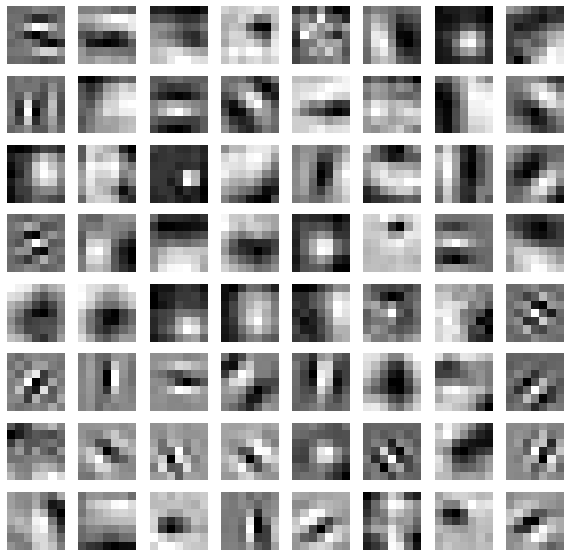

In [18]:
# visualize the first conv layer filters
first_conv_weight = model_weights[0]

plt.figure(figsize=(10, 10))
for i, filter in enumerate(first_conv_weight):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('filter.png')
plt.show()

### Reading the Image and Defining the Transforms.

* Adding the batch dimension is an important step.

In [25]:
# define the transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
])

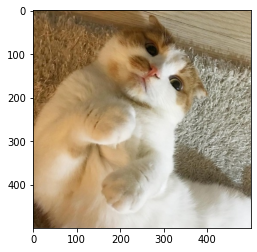

(image original size): (500, 500, 3) type: <class 'numpy.ndarray'>
(apply the transforms): torch.Size([3, 300, 300]) type: <class 'torch.Tensor'>
(add a batch dimension): torch.Size([1, 3, 300, 300])


In [26]:
# convert the image into PIL format, resize it and then convert it to tensor.
# read and visualize an image
img = cv.imread(f"/content/example_image.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

img = np.array(img)
print('(image original size):', img.shape, 'type:', type(img))
# apply the transforms
img = transform(img)
print('(apply the transforms):', img.size(), 'type:', type(img))
# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
print('(add a batch dimension):', img.size())

In [36]:
# pass the image through all the layers
# give the image as input to the first convolutional layer.
first_conv_layer = conv_layers[0]
results = [first_conv_layer(img)]
#print(results[-1].shape)

#  iterate from through the second till the last convolutional layer using a for loop
for i in range(1, len(conv_layers)):
    # give the last layer’s output as the input to the next convolutional layer
    results.append(conv_layers[i](results[-1]))

# make a copy of the `results`
outputs = results

### Visualizing the Feature Maps

We will only visualize 64 feature maps from each layer as any more than that will make the outputs really cluttered.

In [40]:
# visualize 64 features from each layer 
# (Although there are more feature maps in the upper layers)
for num_layer in range(len(outputs)):
    plt.figure(figsize=(20, 20))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break #  break out of the loop if it is the 64𝑡ℎ feature map.
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")
    plt.savefig(f"/content/layer_{num_layer}.png")
    # plt.show()
    plt.close()

torch.Size([64, 150, 150])
Saving layer 0 feature maps...
torch.Size([64, 150, 150])
Saving layer 1 feature maps...
torch.Size([64, 150, 150])
Saving layer 2 feature maps...
torch.Size([64, 150, 150])
Saving layer 3 feature maps...
torch.Size([64, 150, 150])
Saving layer 4 feature maps...
torch.Size([128, 75, 75])
Saving layer 5 feature maps...
torch.Size([128, 75, 75])
Saving layer 6 feature maps...
torch.Size([128, 75, 75])
Saving layer 7 feature maps...
torch.Size([128, 75, 75])
Saving layer 8 feature maps...
torch.Size([256, 38, 38])
Saving layer 9 feature maps...
torch.Size([256, 38, 38])
Saving layer 10 feature maps...
torch.Size([256, 38, 38])
Saving layer 11 feature maps...
torch.Size([256, 38, 38])
Saving layer 12 feature maps...
torch.Size([512, 19, 19])
Saving layer 13 feature maps...
torch.Size([512, 19, 19])
Saving layer 14 feature maps...
torch.Size([512, 19, 19])
Saving layer 15 feature maps...
torch.Size([512, 19, 19])
Saving layer 16 feature maps...


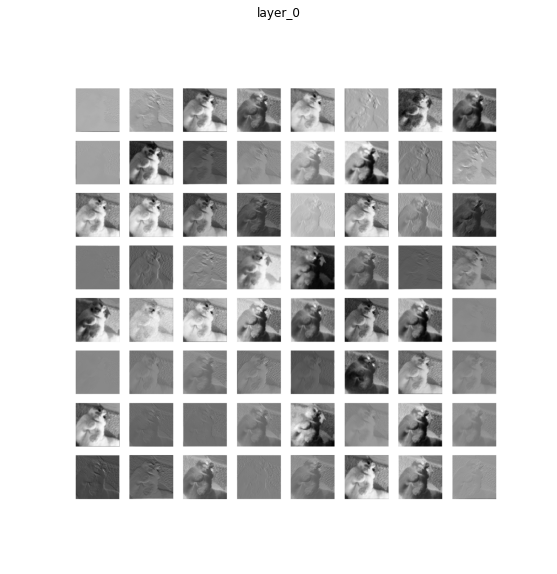

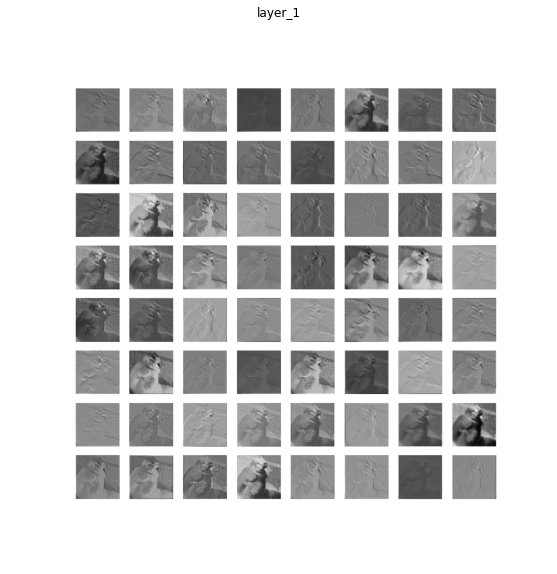

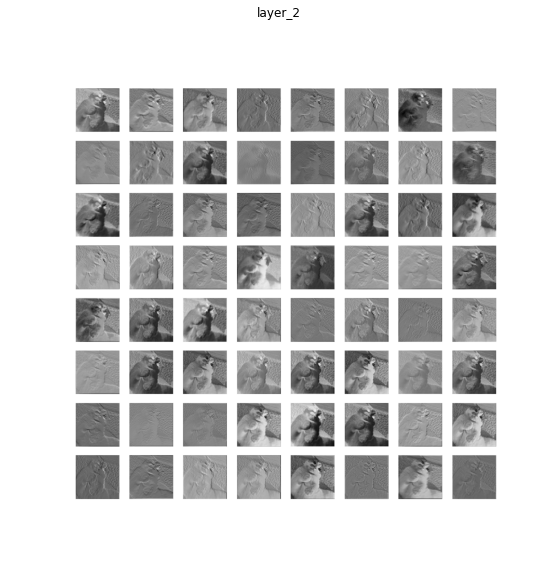

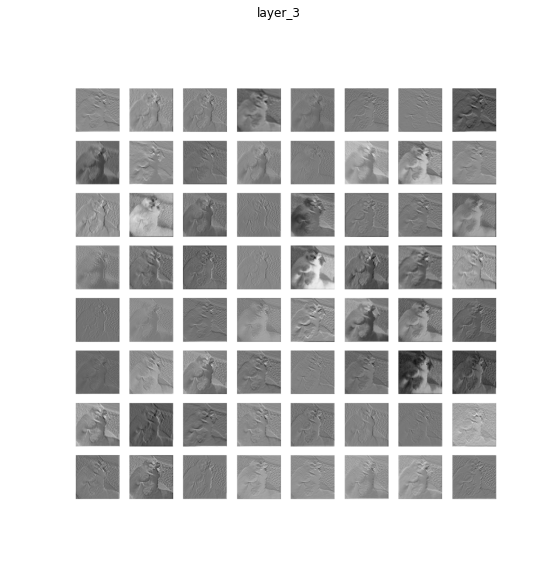

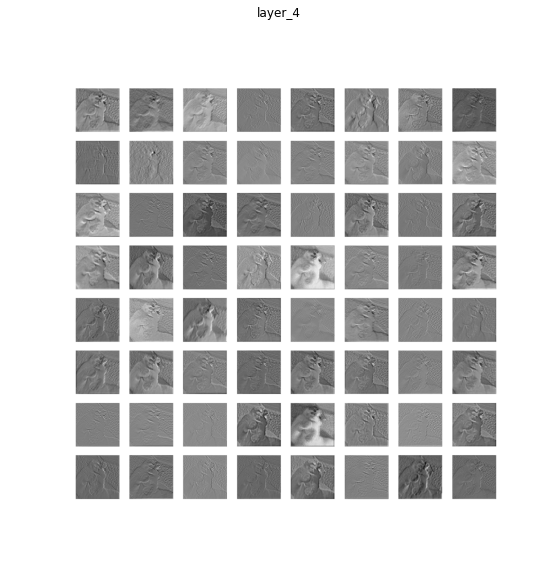

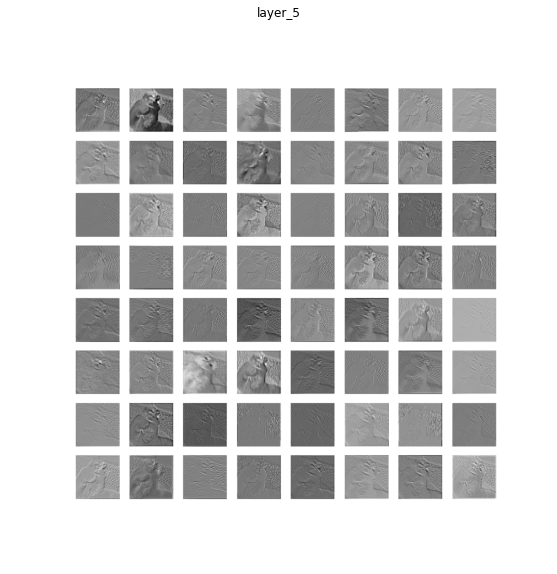

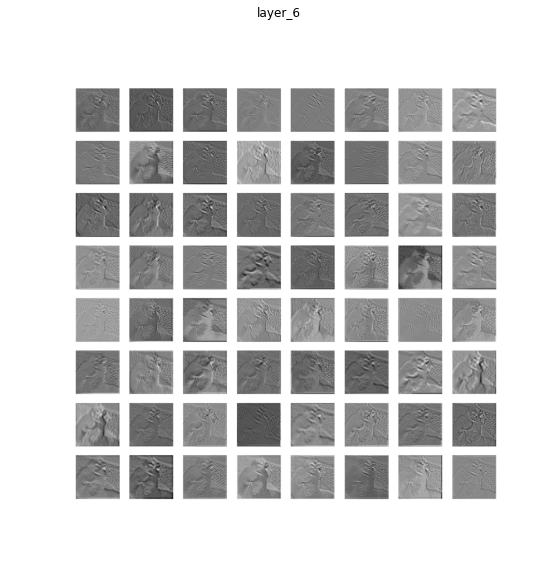

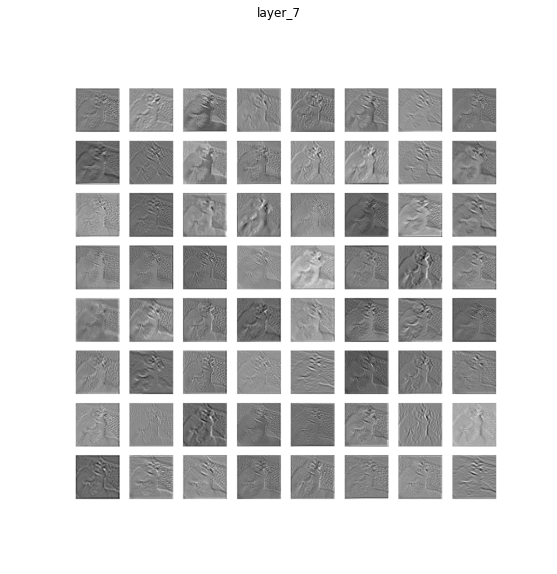

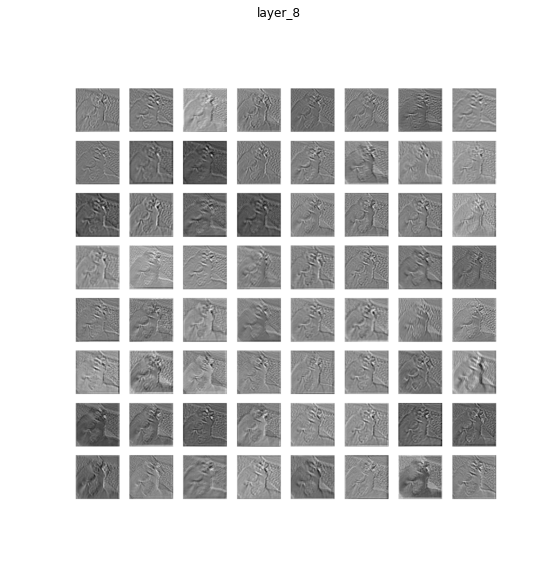

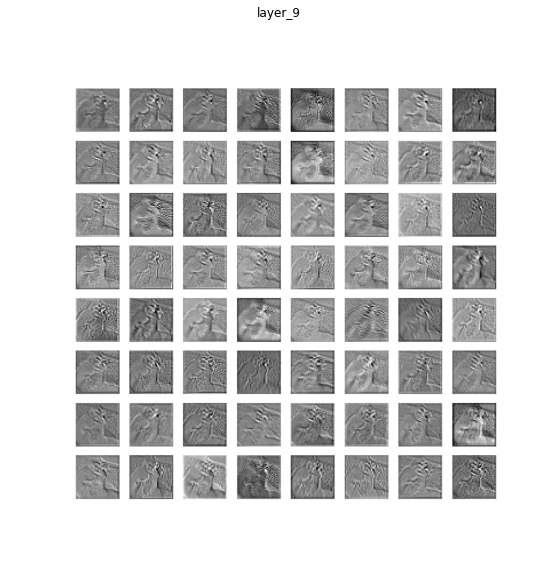

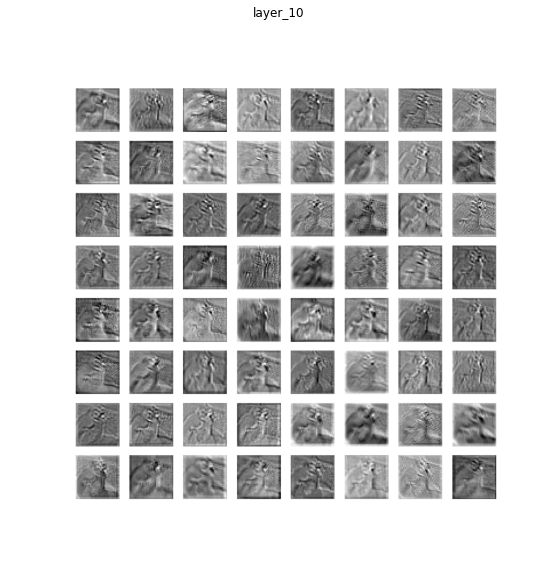

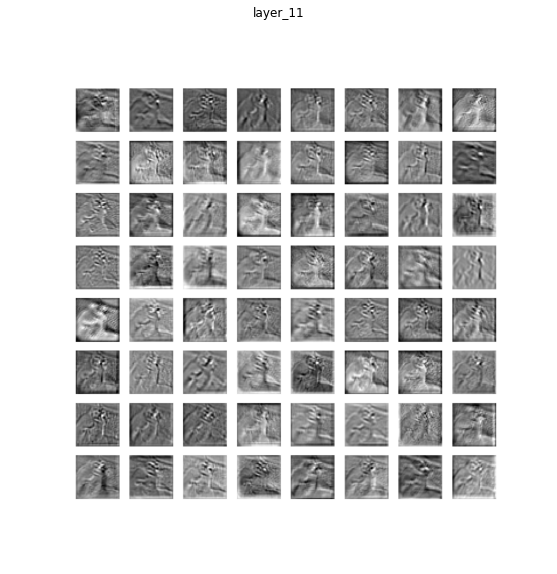

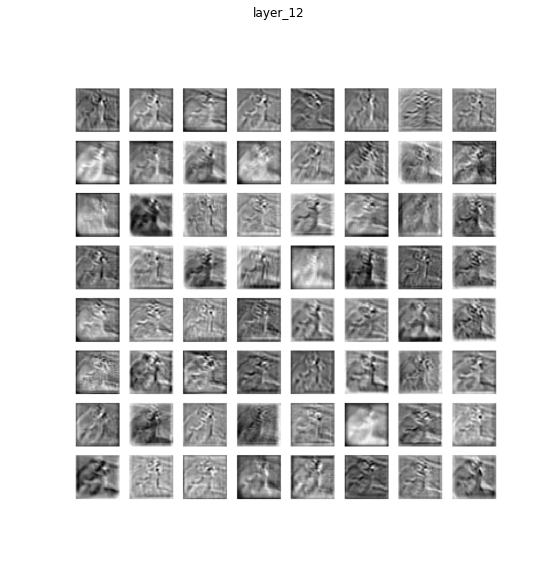

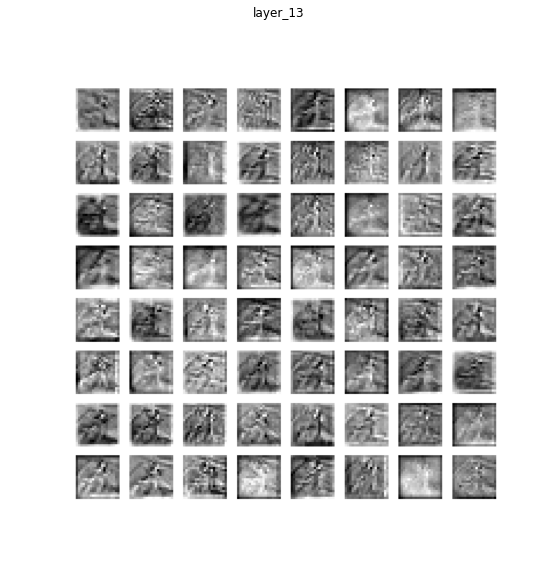

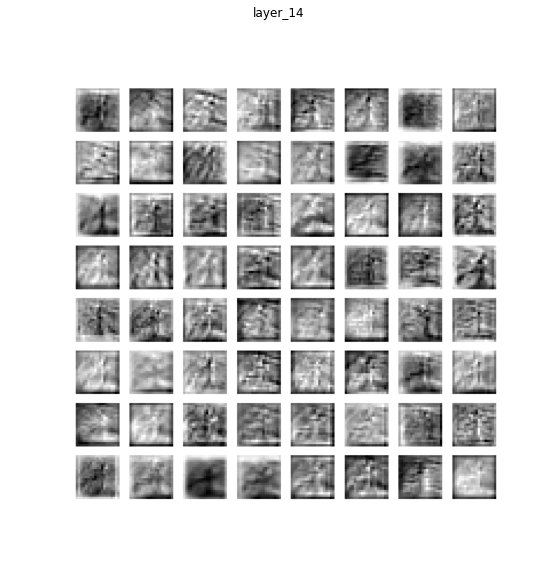

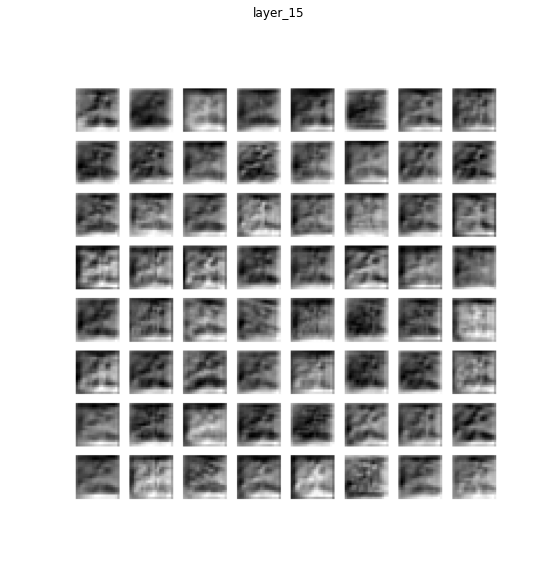

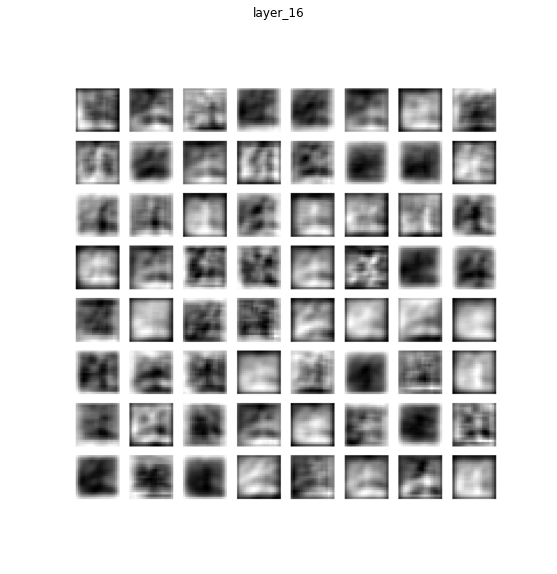

In [41]:
for i in range(17):
    plt.figure(figsize=(10, 10))
    img = cv.imread(f"/content/layer_{i}.png")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.axis('off')
    plt.title(f'layer_{i}')
    plt.imshow(img)
    plt.show()